# Distribuciones

***Clase 3:*** https://github.com/sierraporta/data_science_course__Maestr_Estad_UTB/tree/main/Clase%203

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('data\ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.dtypes)
print("Shape=",data.shape)
data.head()

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
Shape= (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


,NObeyesdad,NObeyesdad
Insufficient_Weight,272,0.128849
Normal_Weight,287,0.135955
Obesity_Type_I,351,0.166272
Obesity_Type_II,297,0.140692
Obesity_Type_III,324,0.153482
Overweight_Level_I,290,0.137376
Overweight_Level_II,290,0.137376


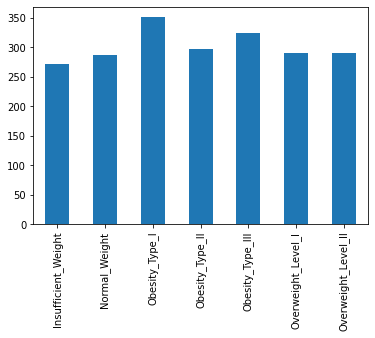

In [3]:
data['NObeyesdad'].value_counts().sort_index().plot.bar()
pd.concat([data['NObeyesdad'].value_counts(), data['NObeyesdad'].value_counts(normalize=True)], axis=1).sort_index()

In [4]:
def plot_hist(data:pd.DataFrame, var_cat:str, var_num:str):
    plt.figure(figsize=(20,6))
    for x in set(data[var_cat]):
        g = sns.distplot(a=data[data[var_cat]==x][var_num], label=x, kde=True);
    plt.title(f"{var_num} by {var_cat}")
    plt.legend()
    plt.show()
    return

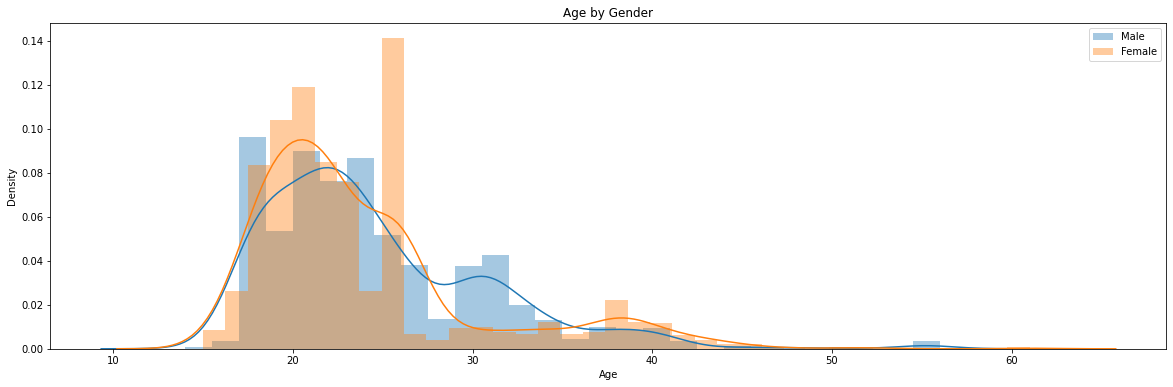

In [5]:
plot_hist(data, "Gender", "Age")

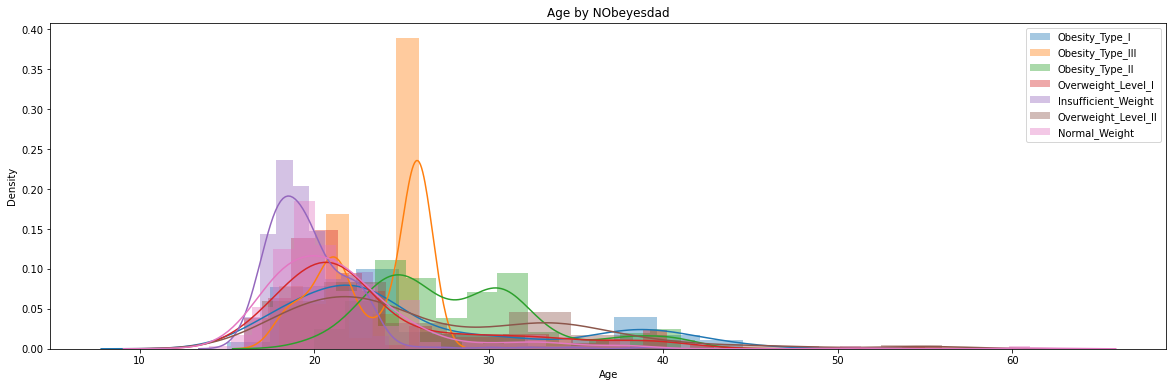

In [6]:
plot_hist(data, "NObeyesdad", "Age")

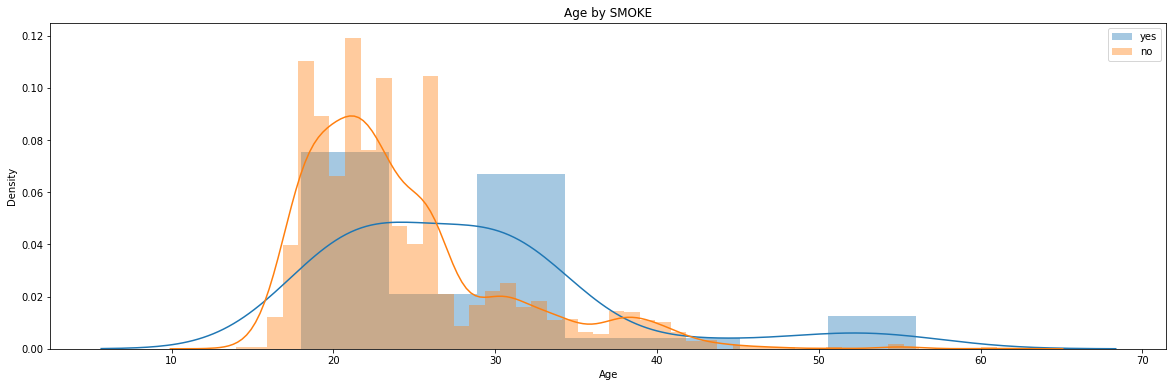

In [7]:
plot_hist(data, "SMOKE", "Age")

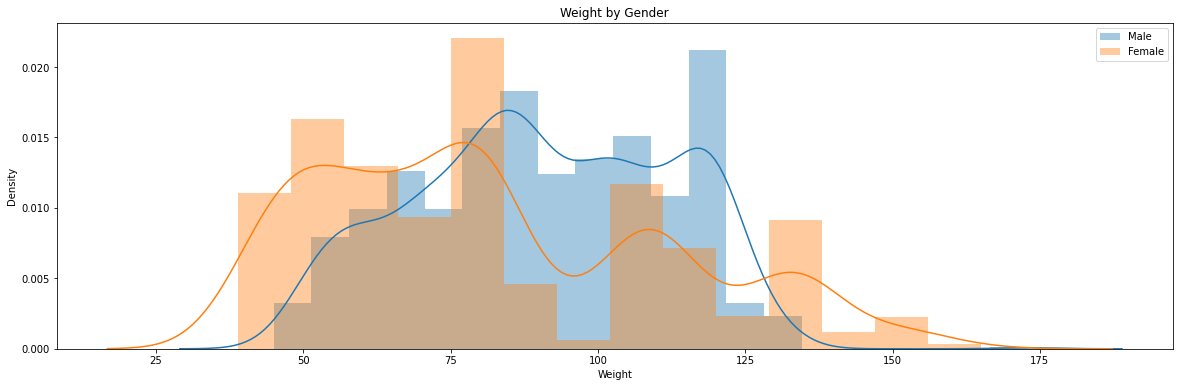

In [8]:
plot_hist(data, "Gender", "Weight")

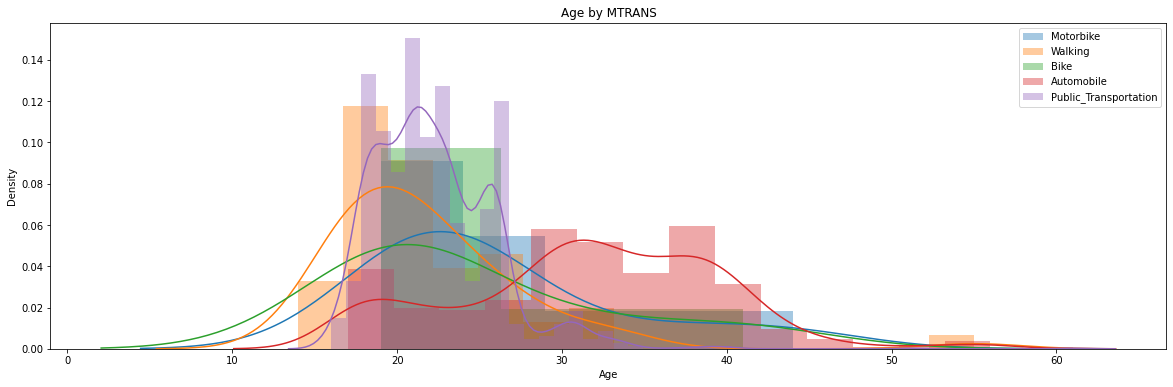

In [9]:
plot_hist(data, "MTRANS", "Age")

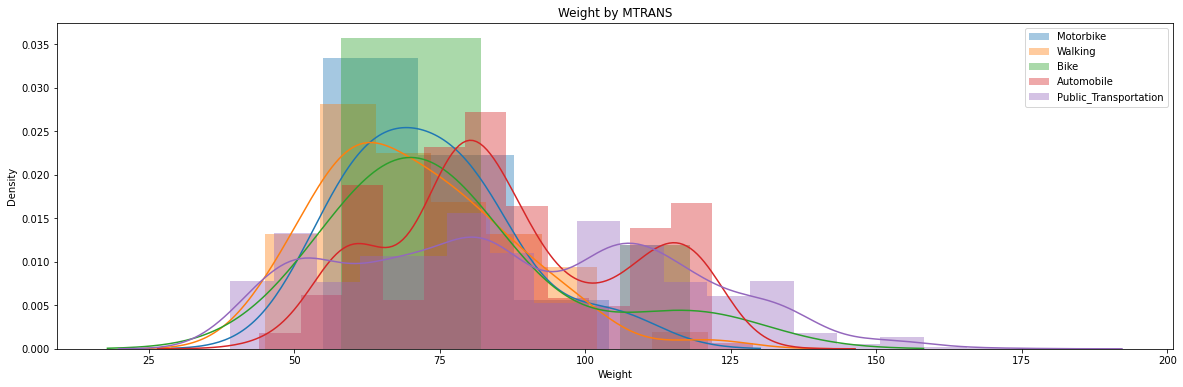

In [10]:
plot_hist(data, "MTRANS", "Weight")

# 2D

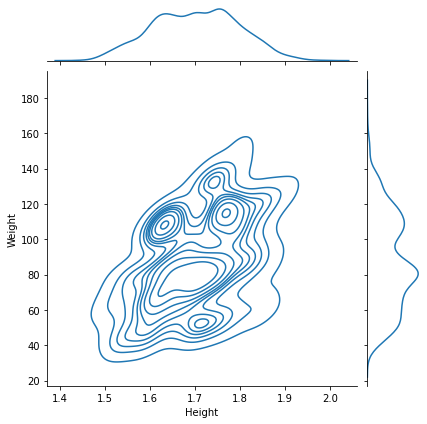

In [11]:
# 2D KDE plot
sns.jointplot(data=data, x='Height', y='Weight', kind="kde")
plt.show()

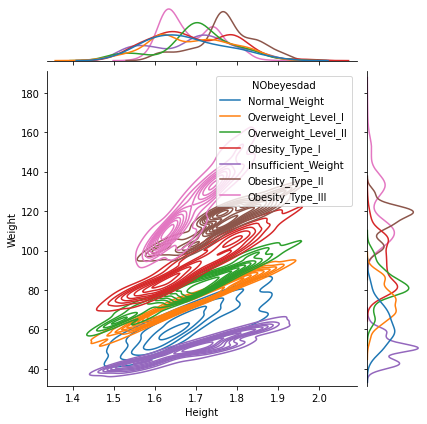

In [12]:
sns.jointplot(data=data, x='Height', y='Weight', kind="kde", hue='NObeyesdad');

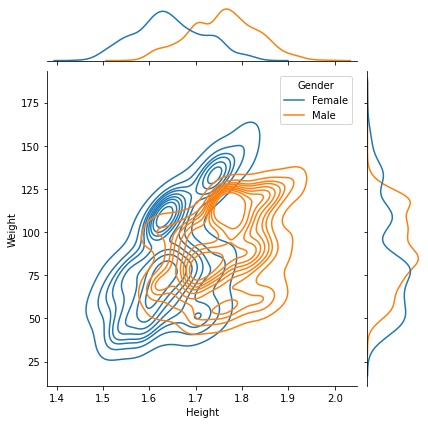

In [15]:
sns.jointplot(data=data, x='Height', y='Weight', kind="kde", hue='Gender');

# Finding the Best Distribution that Fits Your Data using Python’s Fitter Library

In [18]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
beta,0.003342,1099.748738,-28164.254146,inf
gamma,0.003536,1078.641844,-28052.423054,inf
lognorm,0.003547,1085.046687,-28045.880231,inf
norm,0.003594,1114.007615,-28025.991374,inf
burr,0.003687,1086.216281,-27956.802498,inf


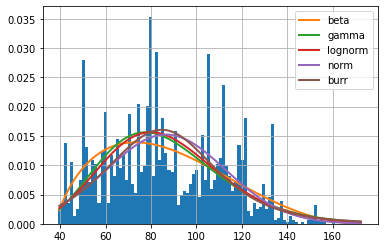

In [23]:
f = Fitter(data['Weight'],distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

Se escoge la que tenga menor error cuadratico y menor aic

In [25]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.7872367644011353,
  'b': 3.2961567194502037,
  'loc': 38.08791053171686,
  'scale': 136.9724176949632}}